In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_AF_segment3_workflowS2_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,1062988|418618|648837,Send for Assessment,Send for Assessment,14/11/2018 15:08:18,1062988,NaN,4,N,1. App to Assessment,Part 1 - Application ID Workflow,...,MCW,HDCW,Full Degree,AF,AF,NaN,NaN,N,0 days 0 hours 0 minutes 35 seconds,35.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'AR - Created - Assessment information (Coursework) (1)',
 'AR - Created - Assessment information (Coursework) (2)',
 'AR - Created - Further information (1)',
 'AR - Created - Further information (2)',
 'AR - Created - Payment of international application fee',
 'AR - Created - Specialisation (Master of Engineering)',
 'AR - Created - University of Melbourne Statement of Results / transcript',
 'AR - Not Satisfied - English language proficiency',
 'AR - Requested - Academic results for prior tertiary studies',
 'AR - Requested - English language proficiency',
 'AR - Requested - Further information (1)',
 'AR - Requested - Official syllabus or subject descriptions (in English)',
 'AR - Requested - Payment of international application fee',
 'AR - Reviewed - English language proficiency',
 'AR - Reviewed - Graduate Access Melbourne',
 'AR - Satisfied - Academic results for prior tertiary studies',
 'AR - Satisfied - Advanced Standing',
 'AR - Satisfied - Assessment information (Coursew

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

623

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,OC - Reviewed - English language requirements,Back to Triage,AR - Satisfied - Official syllabus or subject descriptions (in English),PREPARE TO LOCK,Close Referral,OC - Created - Evidence of course completion,Put Triage On-Hold,Send Referral,Assessment Decision - No Decision,Provide Response,...,OC - Satisfied - English language requirements,Assessment Decision - Not Qualified,AR - Satisfied - Entry points (Master of Information Technology),AR - Requested - Academic results for prior tertiary studies,Release Assessment Hold,AR - Satisfied - Academic results for prior tertiary studies,AR - Created - Specialisation (Master of Engineering),AR - Satisfied - Current enrolment at the University of Melbourne,AR - Satisfied - University of Melbourne Statement of Results / transcript,Assessment Outcome - Ineligible / Withdrawn
916194|552425|845125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982703|311743|766648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697910|367618|573610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058761|412208|639044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833627|426805|661347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116512|486416|746788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068714|426468|660844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886776|417211|646765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833200|362700|565447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

623

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,OC - Reviewed - English language requirements,Back to Triage,AR - Satisfied - Official syllabus or subject descriptions (in English),PREPARE TO LOCK,Close Referral,OC - Created - Evidence of course completion,Put Triage On-Hold,Send Referral,Assessment Decision - No Decision,Provide Response,...,OC - Satisfied - English language requirements,Assessment Decision - Not Qualified,AR - Satisfied - Entry points (Master of Information Technology),AR - Requested - Academic results for prior tertiary studies,Release Assessment Hold,AR - Satisfied - Academic results for prior tertiary studies,AR - Created - Specialisation (Master of Engineering),AR - Satisfied - Current enrolment at the University of Melbourne,AR - Satisfied - University of Melbourne Statement of Results / transcript,Assessment Outcome - Ineligible / Withdrawn
916194|552425|845125,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
982703|311743|766648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697910|367618|573610,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1058761|412208|639044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
833627|426805|661347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116512|486416|746788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1068714|426468|660844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
886776|417211|646765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
833200|362700|565447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Assessment Outcome - Successful')
features.remove('Assessment Outcome - Not Successful')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Assessment Outcome - Successful'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

67
65


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [13]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[95  2]
 [ 9 50]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        97
           1       0.96      0.85      0.90        59

    accuracy                           0.93       156
   macro avg       0.94      0.91      0.92       156
weighted avg       0.93      0.93      0.93       156



In [14]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

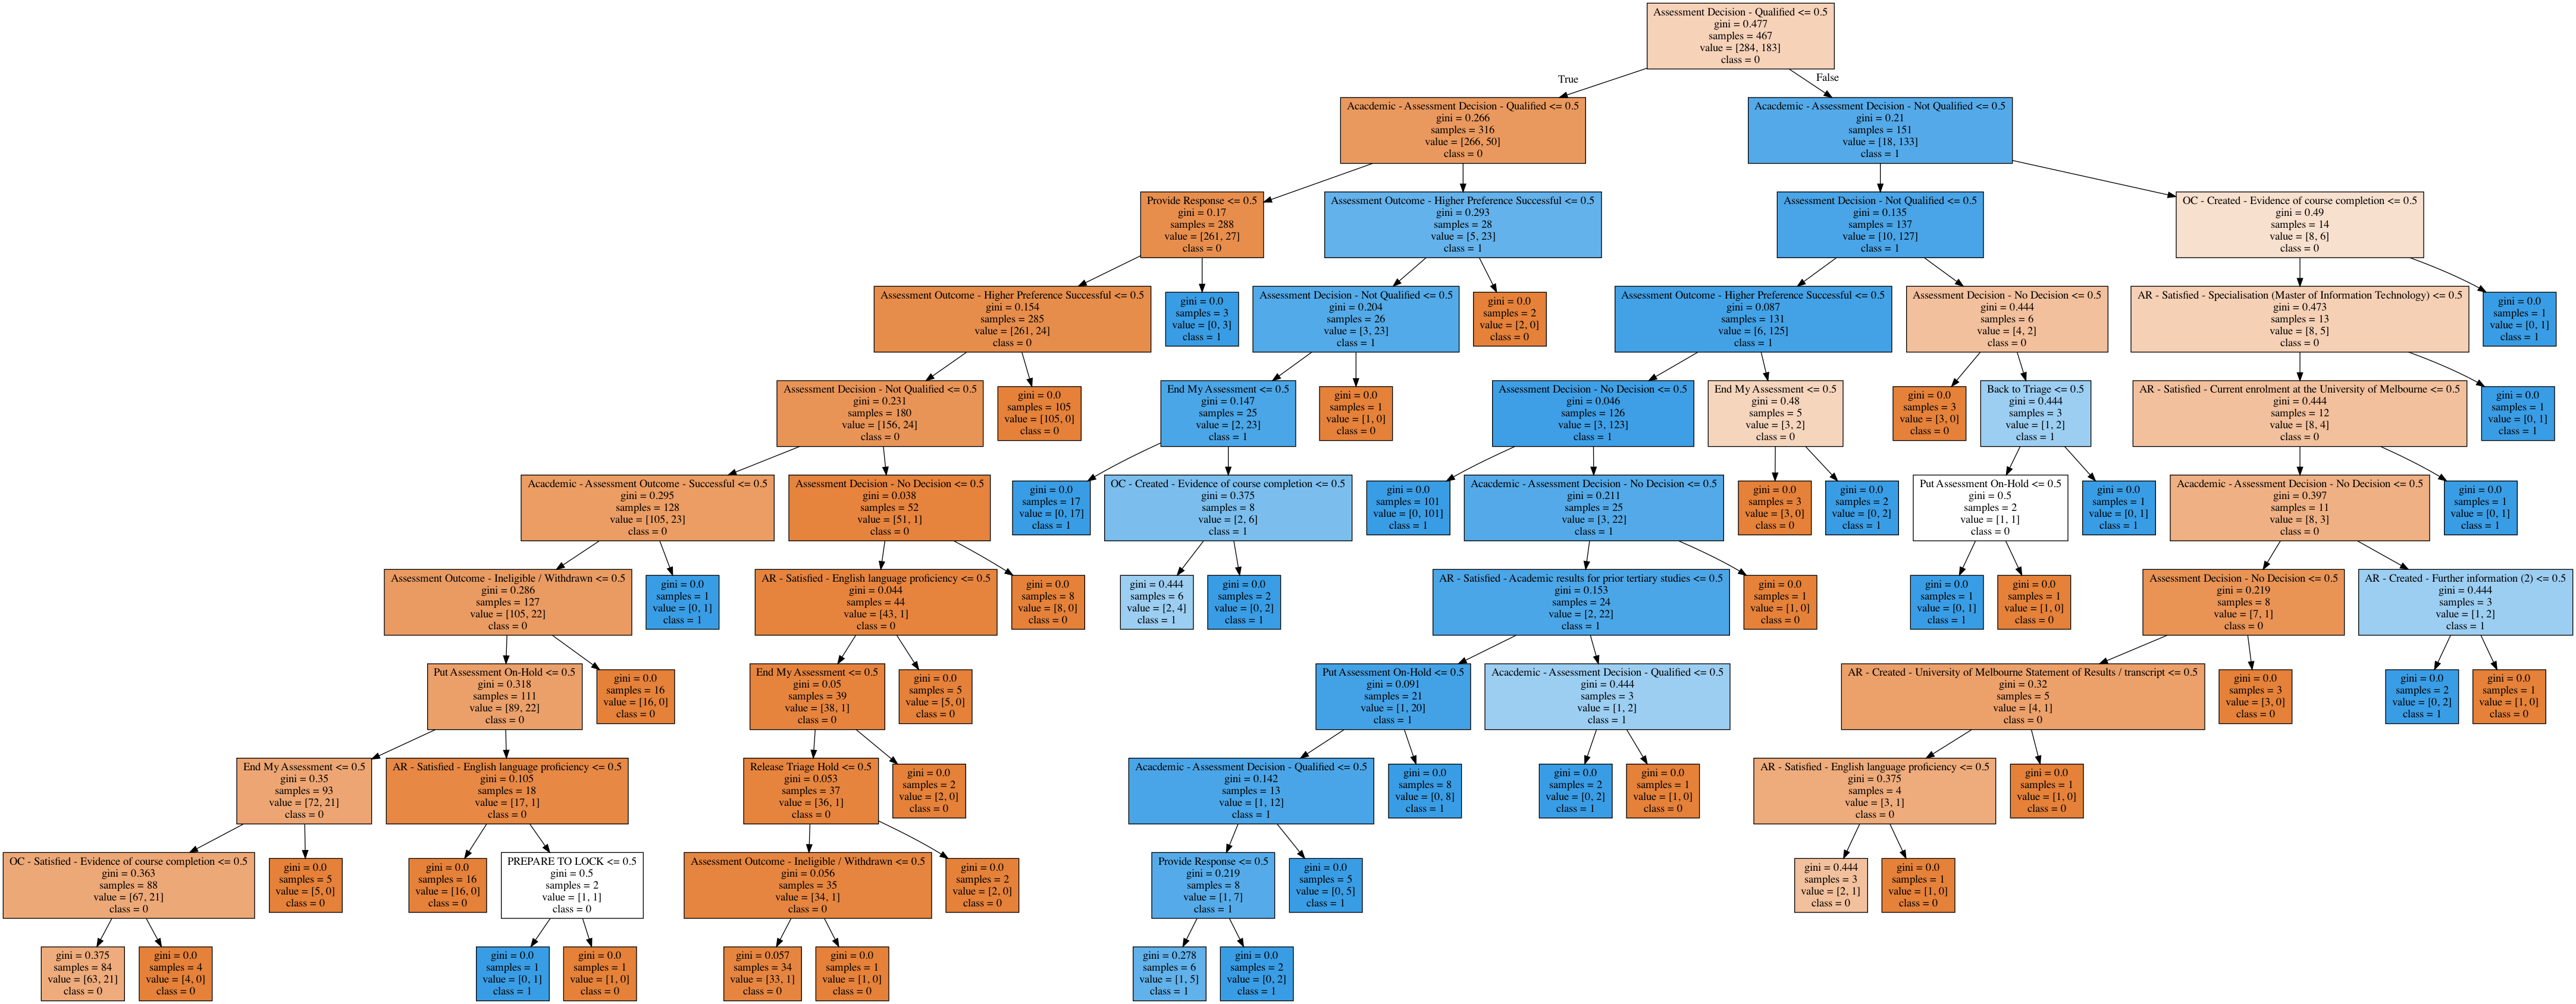

In [15]:
# Show graph
Image(graph.create_png())

In [16]:
# Create PNG
graph.write_png("engineering_AF_segment3_workflowS2_decisiontree.png")




True

In [17]:
zero_one_table['Assessment Outcome - Successful'].value_counts()

0    381
1    242
Name: Assessment Outcome - Successful, dtype: int64

In [18]:
from sklearn.utils import resample

# Separate majority and minority classes
zero_one_table_majority = df[zero_one_table['Assessment Outcome - Successful']==0]
zero_one_table_minority = df[zero_one_table['Assessment Outcome - Successful']==1]

# Upsample minority class
df_majority_downsampled = resample(zero_one_table_majority,
                                 replace=False,     # sample with replacement
                                 n_samples=242,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([zero_one_table_minority, df_majority_downsampled])

# Display new class counts
df_downsampled = df_downsampled.fillna(0)
df_downsampled['Assessment Outcome - Successful'].value_counts()

1    242
0    242
Name: Assessment Outcome - Successful, dtype: int64

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_downsampled[features]
y=df_downsampled ['Assessment Outcome - Successful'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8842975206611571


In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57  4]
 [10 50]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        61
           1       0.93      0.83      0.88        60

    accuracy                           0.88       121
   macro avg       0.89      0.88      0.88       121
weighted avg       0.89      0.88      0.88       121



In [22]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

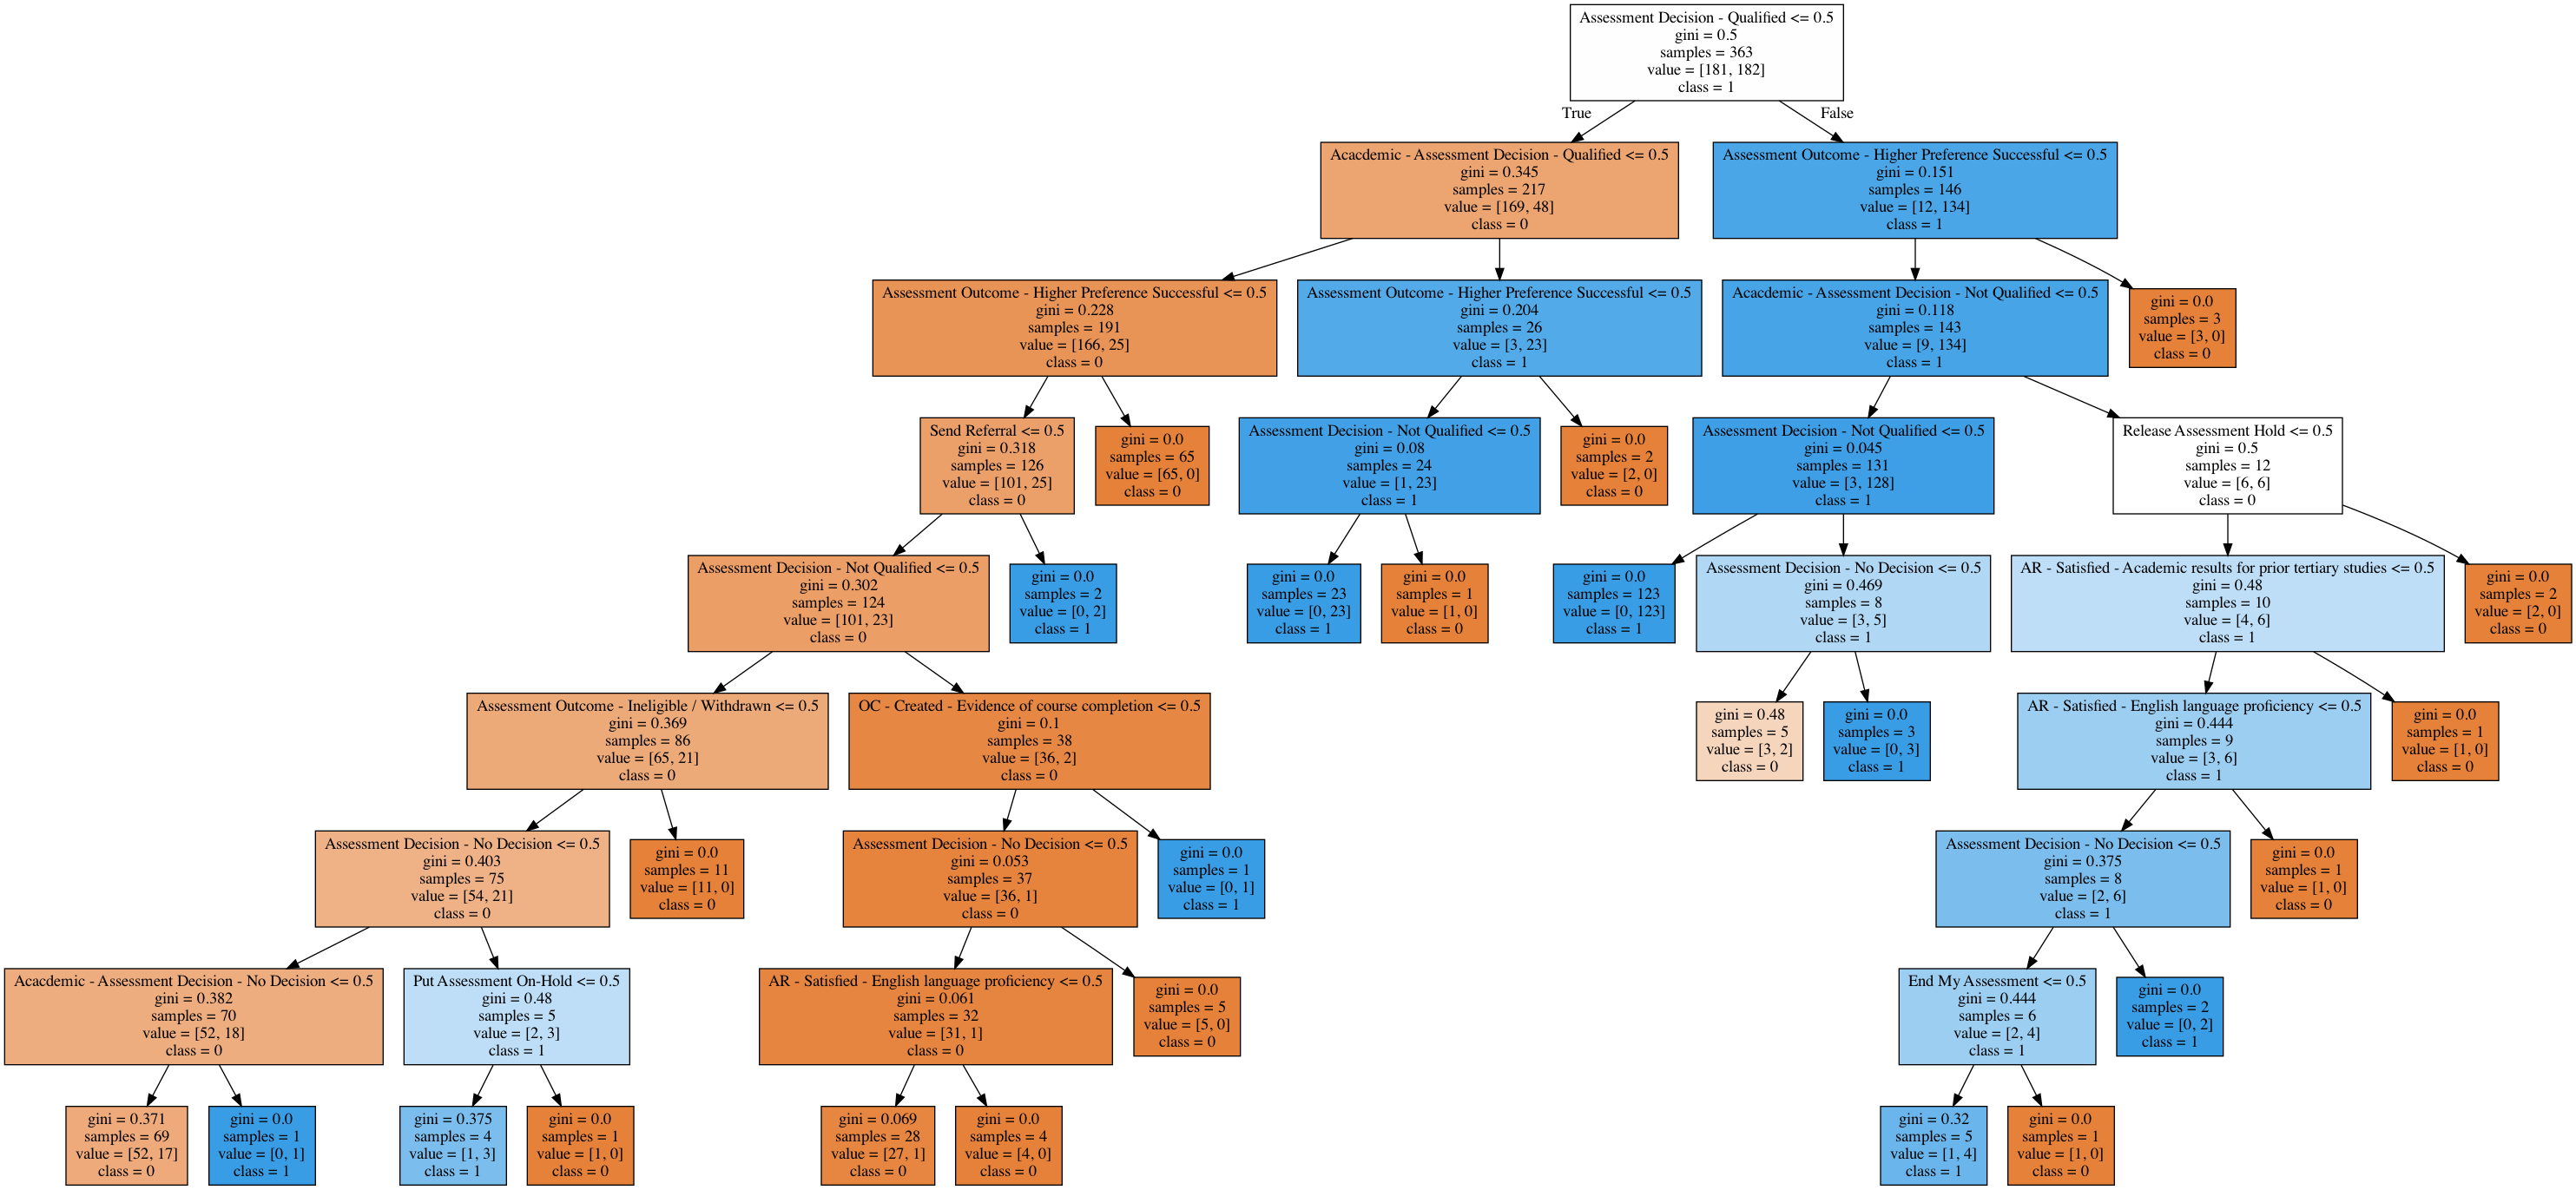

In [23]:
# Show graph
Image(graph.create_png())

In [24]:
# Create PNG
graph.write_png("engineering_AF_segment3_workflowS2_decisiontree_downsampled.png")

True